# PROYECTO PARA AGROSPOT 🌳


Creación de datos ficticios

In [38]:
%%writefile data.csv
fecha,sector,humedad,etapa
2024-08-10 14:23:15,Campo1,65,Germinación
2024-08-10 15:00:30,Campo2,55,Crecimiento
2024-08-10 16:12:45,Campo1,45,Floración
2024-08-10 17:25:00,Campo3,25,Maduración
2024-08-11 08:10:20,Campo2,72,Crecimiento
2024-08-11 09:45:35,Campo3,35,Floración
2024-08-11 10:30:50,Campo1,80,Maduración
2024-08-11 11:55:05,Campo2,50,Germinación

Overwriting data.csv


In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pandas as pd


--- Sistema de Monitoreo de Humedad del Suelo ---
1. Ingresar datos de humedad
2. Ver promedio de humedad general
3. Visualizar datos por sector y etapa
4. Cargar datos desde CSV
5. Salir
Seleccione una opción: 4
Ingrese el nombre del archivo CSV para cargar: data.csv
Datos cargados exitosamente.

--- Sistema de Monitoreo de Humedad del Suelo ---
1. Ingresar datos de humedad
2. Ver promedio de humedad general
3. Visualizar datos por sector y etapa
4. Cargar datos desde CSV
5. Salir
Seleccione una opción: 3


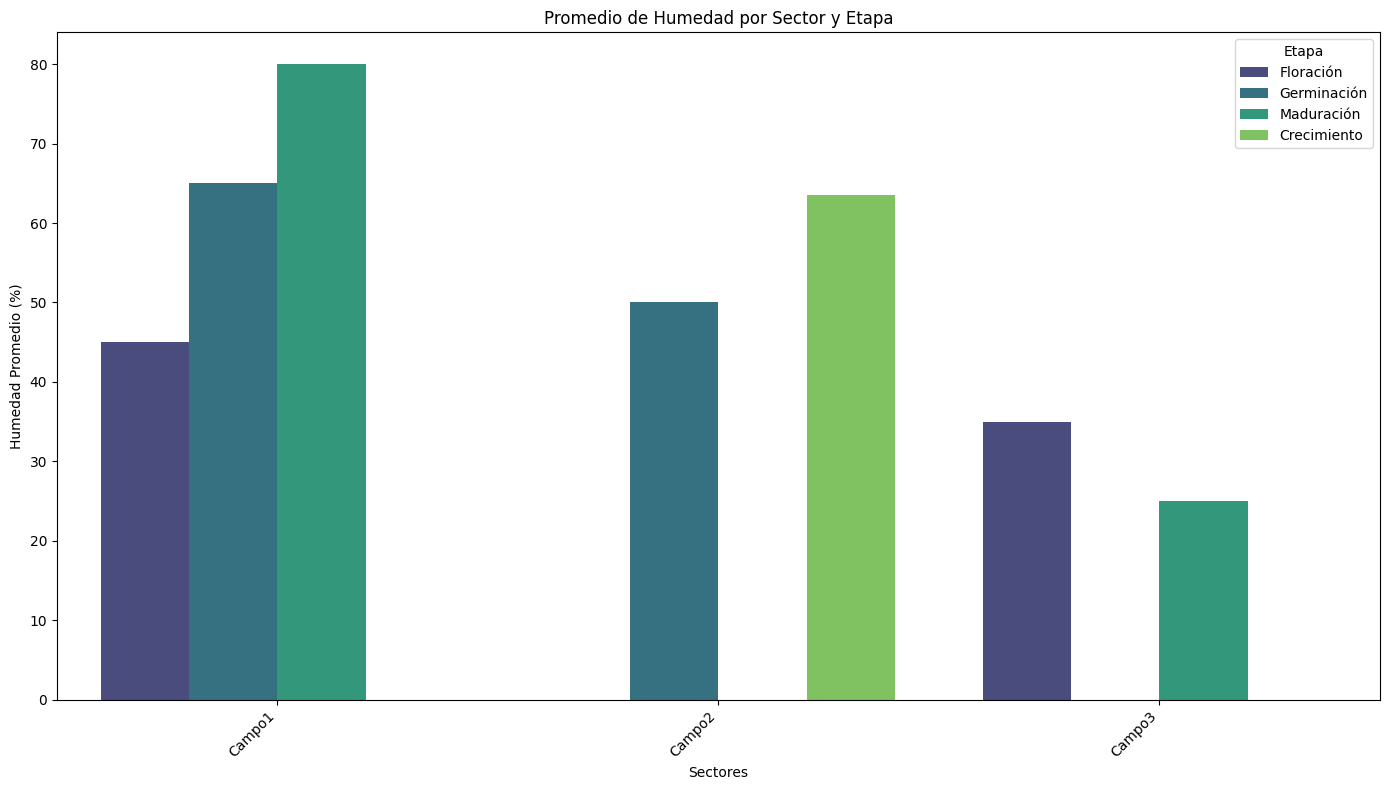


--- Sistema de Monitoreo de Humedad del Suelo ---
1. Ingresar datos de humedad
2. Ver promedio de humedad general
3. Visualizar datos por sector y etapa
4. Cargar datos desde CSV
5. Salir
Seleccione una opción: 2
Promedio de humedad general: 50.78%
Promedios por sector:
Campo1: 63.33%
Campo2: 59.00%
Campo3: 30.00%

--- Sistema de Monitoreo de Humedad del Suelo ---
1. Ingresar datos de humedad
2. Ver promedio de humedad general
3. Visualizar datos por sector y etapa
4. Cargar datos desde CSV
5. Salir
Seleccione una opción: 5
Gracias por usar el sistema. ¡Hasta luego!


In [39]:
class SistemaMonitoreoHumedad:
    def __init__(self):
        # Diccionario para almacenar los datos de humedad por sector
        self.datos_humedad = defaultdict(list)
        # Nombre del archivo CSV donde se guardarán los datos
        self.archivo_csv = "datos_humedad.csv"
        # Diccionario con los rangos de humedad para cada etapa del cultivo
        self.rangos_humedad = {
            "Germinación": (60, 80),
            "Crecimiento": (50, 70),
            "Floración": (40, 60),
            "Maduración": (30, 50)
        }

    def ingresar_datos(self):
        # Obtener la fecha y hora actual
        fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        # Solicitar al usuario el nombre del sector, el porcentaje de humedad y la etapa del cultivo
        sector = input("Ingrese el nombre del sector: ")
        etapa = self.seleccionar_etapa()
        humedad = float(input("Ingrese el porcentaje de humedad (0-100): "))

        # Guardar los datos en el diccionario
        clasificacion = self.clasificar_humedad(humedad, etapa)
        self.datos_humedad[sector].append({
            'fecha': fecha,
            'humedad': humedad,
            'clasificacion': clasificacion,
            'etapa': etapa
        })
        # Guardar los datos en el archivo CSV
        self.guardar_datos(fecha, sector, humedad, clasificacion, etapa)

    def seleccionar_etapa(self):
        """
        Muestra las etapas disponibles y permite al usuario seleccionar una etapa.
        """
        print("\nEtapas disponibles:")
        for i, etapa in enumerate(self.rangos_humedad.keys(), 1):
            print(f"{i}. {etapa}")

        while True:
            try:
                opcion = int(input("Seleccione el número de la etapa actual: "))
                return list(self.rangos_humedad.keys())[opcion - 1]
            except (ValueError, IndexError):
                print("Opción no válida. Intente de nuevo.")

    def clasificar_humedad(self, humedad, etapa):
        """
        Clasifica el nivel de humedad según los rangos establecidos para cada etapa.
        Devuelve "Bajo", "Óptimo" o "Alto".
        """
        rango_minimo, rango_maximo = self.rangos_humedad[etapa]

        if humedad < rango_minimo:
            return "Bajo"
        elif rango_minimo <= humedad <= rango_maximo:
            return "Óptimo"
        else:
            return "Alto"

    def calcular_promedio(self):
        """
        Calcula el promedio de humedad de todos los sectores registrados y
        el promedio de humedad general.
        Retorna 0 si no hay datos o si son inválidos, o el promedio general calculado
        y un diccionario con los promedios por sector.
        """
        if not self.datos_humedad:
            return 0

        total_humedad = 0
        total_lecturas = 0
        promedios = {}

        for sector, lecturas in self.datos_humedad.items():
            if lecturas:
                promedio_sector = sum(lectura['humedad'] for lectura in lecturas) / len(lecturas)
                promedios[sector] = promedio_sector
                total_humedad += promedio_sector
                total_lecturas += 1

        return total_humedad / total_lecturas if total_lecturas > 0 else 0, promedios

    def guardar_datos(self, fecha, sector, humedad, clasificacion, etapa):
        """
        Guarda los datos en el archivo CSV.
        """
        with open(self.archivo_csv, mode='a', newline='') as archivo:
            writer = csv.writer(archivo)
            writer.writerow([fecha, sector, humedad, clasificacion, etapa])

    def cargar_datos_csv(self, archivo):
        """
        Carga los datos desde un archivo CSV, calculando la clasificación en base a la humedad y etapa.
        """
        try:
            with open(archivo, mode='r') as archivo_csv:
                reader = csv.DictReader(archivo_csv)
                for row in reader:
                    fecha = row['fecha']
                    sector = row['sector']
                    humedad = float(row['humedad'])
                    etapa = row['etapa']
                    clasificacion = self.clasificar_humedad(humedad, etapa)
                    self.datos_humedad[sector].append({
                        'fecha': fecha,
                        'humedad': humedad,
                        'clasificacion': clasificacion,
                        'etapa': etapa
                    })
            print("Datos cargados exitosamente.")
        except FileNotFoundError:
            print("Archivo no encontrado.")
        except KeyError as e:
            print(f"Falta una columna en el archivo CSV: {e}")
        except ValueError as e:
            print(f"Error en los datos del archivo CSV: {e}")

    def visualizar_datos(self):
        """
        Visualiza los datos en un gráfico de barras.
        """
        if not self.datos_humedad:
            print("No hay datos para visualizar.")
            return

        # Preparar los datos para la visualización
        datos_lista = []
        for sector, lecturas in self.datos_humedad.items():
            for lectura in lecturas:
                datos_lista.append({
                    'Sector': sector,
                    'Humedad (%)': lectura['humedad'],
                    'Etapa': lectura['etapa']
                })

        df = pd.DataFrame(datos_lista)
        df_promedios = df.groupby(['Sector', 'Etapa']).agg({'Humedad (%)': 'mean'}).reset_index()

        # Crear la figura y el gráfico con seaborn
        plt.figure(figsize=(14, 8))
        sns.barplot(data=df_promedios, x='Sector', y='Humedad (%)', hue='Etapa', palette='viridis')

        plt.xlabel('Sectores')
        plt.ylabel('Humedad Promedio (%)')
        plt.title('Promedio de Humedad por Sector y Etapa')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def ejecutar(self):
        while True:
            # Mostrar el menú principal
            print("\n--- Sistema de Monitoreo de Humedad del Suelo ---")
            print("1. Ingresar datos de humedad")
            print("2. Ver promedio de humedad general")
            print("3. Visualizar datos por sector y etapa")
            print("4. Cargar datos desde CSV")
            print("5. Salir")
            opcion = input("Seleccione una opción: ")

            if opcion == "1":
                self.ingresar_datos()
            elif opcion == "2":
                promedio, promedios_sector = self.calcular_promedio()
                print(f"Promedio de humedad general: {promedio:.2f}%")
                print("Promedios por sector:")
                for sector, promedio_sector in promedios_sector.items():
                    print(f"{sector}: {promedio_sector:.2f}%")
            elif opcion == "3":
                self.visualizar_datos()
            elif opcion == "4":
                archivo = input("Ingrese el nombre del archivo CSV para cargar: ")
                self.cargar_datos_csv(archivo)
            elif opcion == "5":
                print("Gracias por usar el sistema. ¡Hasta luego!")
                break
            else:
                print("Opción no válida. Intente de nuevo.")
# Punto de entrada del programa
if __name__ == "__main__":
    sistema = SistemaMonitoreoHumedad()
    sistema.ejecutar()

##Explicación de defaultdict

defaultdict es una subclase de dict que proporciona un valor por defecto para las claves que no existen en el diccionario.

self.datos_humedad = defaultdict(list) crea un diccionario en el que, si se accede a una clave que no existe aún, defaultdict automáticamente asigna un valor por defecto, en este caso, una lista vacía (list).

Ventajas:

* Evita la Necesidad de Inicializar Claves:
No necesitas verificar si una clave existe en el diccionario antes de agregar elementos. Puedes simplemente añadir elementos a la lista asociada con cualquier clave.

* Código Más Limpio:
Simplifica el código porque no tienes que manejar casos en los que la clave no existe y evitar errores de clave no encontrada.